## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [5]:
import os
import keras
import itertools
from keras.layers import BatchNormalization

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## Hw1

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu",  name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256 ]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batchSize = %.6f." % (bs))

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=bs, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "BatchSize-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with batchSize = 2.000000.
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________

50000/50000 [==============================] - 30s 608us/step - loss: 1.1381 - acc: 0.5951 - val_loss: 1.3574 - val_acc: 0.5313
Epoch 44/50
50000/50000 [==============================] - 30s 609us/step - loss: 1.1294 - acc: 0.5997 - val_loss: 1.3763 - val_acc: 0.5223
Epoch 45/50
50000/50000 [==============================] - 31s 625us/step - loss: 1.1321 - acc: 0.5970 - val_loss: 1.3699 - val_acc: 0.5230
Epoch 46/50
50000/50000 [==============================] - 31s 621us/step - loss: 1.1430 - acc: 0.5960 - val_loss: 1.3694 - val_acc: 0.5205
Epoch 47/50
50000/50000 [==============================] - 31s 620us/step - loss: 1.1459 - acc: 0.5923 - val_loss: 1.4141 - val_acc: 0.5017
Epoch 48/50
50000/50000 [==============================] - 32s 633us/step - loss: 1.1349 - acc: 0.5969 - val_loss: 1.4039 - val_acc: 0.5102
Epoch 49/50
50000/50000 [==============================] - 32s 641us/step - loss: 1.1301 - acc: 0.5988 - val_loss: 1.3988 - val_acc: 0.5194
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 15s 307us/step - loss: 0.8584 - acc: 0.6935 - val_loss: 1.5217 - val_acc: 0.5054
Epoch 42/50
50000/50000 [==============================] - 16s 311us/step - loss: 0.8443 - acc: 0.7006 - val_loss: 1.5118 - val_acc: 0.5143
Epoch 43/50
50000/50000 [==============================] - 15s 307us/step - loss: 0.8368 - acc: 0.6993 - val_loss: 1.5533 - val_acc: 0.5098
Epoch 44/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.8487 - acc: 0.6965 - val_loss: 1.5417 - val_acc: 0.5014
Epoch 45/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.8340 - acc: 0.6999 - val_loss: 1.5398 - val_acc: 0.5156
Epoch 46/50
50000/50000 [==============================] - 15s 308us/step - loss: 0.8295 - acc: 0.7055 - val_loss: 1.6435 - val_acc: 0.4828
Epoch 47/50
50000/50000 [==============================] - 15s 308us/step - loss: 0.8147 - acc: 0.7066 - val_loss: 1.5972 - val_acc: 0.4957
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 4s 75us/step - loss: 0.3464 - acc: 0.8910 - val_loss: 2.0159 - val_acc: 0.4836
Epoch 38/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.3222 - acc: 0.9016 - val_loss: 2.0079 - val_acc: 0.4795
Epoch 39/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.3109 - acc: 0.9043 - val_loss: 2.1745 - val_acc: 0.4610
Epoch 40/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.2935 - acc: 0.9118 - val_loss: 2.1787 - val_acc: 0.4557
Epoch 41/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.2768 - acc: 0.9161 - val_loss: 2.1474 - val_acc: 0.4713
Epoch 42/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.2606 - acc: 0.9228 - val_loss: 2.2214 - val_acc: 0.4583
Epoch 43/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.2428 - acc: 0.9303 - val_loss: 2.1719 - val_acc: 0.4694
Epoch 44/50
50000/50000 [=====================

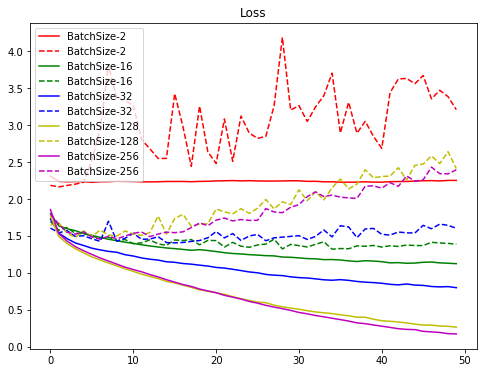

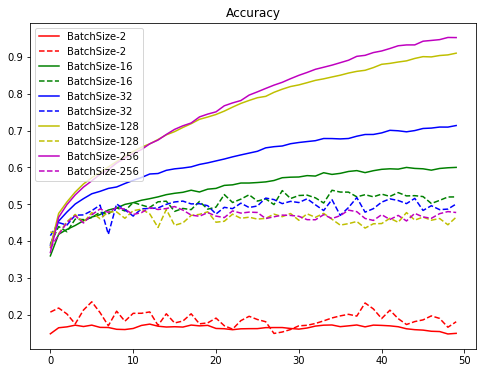

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",
             "tab:orange","tab:purple","tab:brown","tab:pink","tab:gray","tab:cyan"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Hw2

In [6]:
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, activation="relu",  name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batchSize = %.6f." % (bs))

    model = build_mlp_2(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=bs, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "BatchSize-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with batchSize = 2.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 12

50000/50000 [==============================] - 27s 548us/step - loss: 0.5829 - acc: 0.7939 - val_loss: 1.5739 - val_acc: 0.5447
Epoch 48/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.5774 - acc: 0.7945 - val_loss: 1.5796 - val_acc: 0.5451
Epoch 49/50
50000/50000 [==============================] - 27s 548us/step - loss: 0.5699 - acc: 0.7959 - val_loss: 1.5620 - val_acc: 0.5506
Epoch 50/50
50000/50000 [==============================] - 28s 552us/step - loss: 0.5558 - acc: 0.8026 - val_loss: 1.5921 - val_acc: 0.5475
Experiment with batchSize = 32.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (De

50000/50000 [==============================] - 14s 284us/step - loss: 0.2929 - acc: 0.8967 - val_loss: 2.0066 - val_acc: 0.5411
Epoch 46/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.2894 - acc: 0.8967 - val_loss: 2.0157 - val_acc: 0.5425
Epoch 47/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.2822 - acc: 0.8991 - val_loss: 2.0452 - val_acc: 0.5457
Epoch 48/50
50000/50000 [==============================] - 14s 285us/step - loss: 0.2754 - acc: 0.9020 - val_loss: 2.0337 - val_acc: 0.5420
Epoch 49/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.2747 - acc: 0.9036 - val_loss: 2.0484 - val_acc: 0.5470
Epoch 50/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.2611 - acc: 0.9072 - val_loss: 2.0987 - val_acc: 0.5417
Experiment with batchSize = 128.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


50000/50000 [==============================] - 4s 74us/step - loss: 0.0725 - acc: 0.9874 - val_loss: 2.3578 - val_acc: 0.5037
Epoch 42/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.0601 - acc: 0.9906 - val_loss: 2.3865 - val_acc: 0.5024
Epoch 43/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.0551 - acc: 0.9916 - val_loss: 2.4252 - val_acc: 0.4999
Epoch 44/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.0484 - acc: 0.9931 - val_loss: 2.4547 - val_acc: 0.4996
Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.0511 - acc: 0.9922 - val_loss: 2.4811 - val_acc: 0.5021
Epoch 46/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.0514 - acc: 0.9916 - val_loss: 2.5388 - val_acc: 0.5012
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.0526 - acc: 0.9907 - val_loss: 2.5197 - val_acc: 0.5060
Epoch 48/50
50000/50000 [=====================

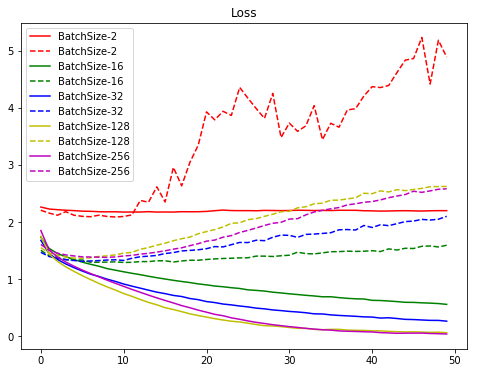

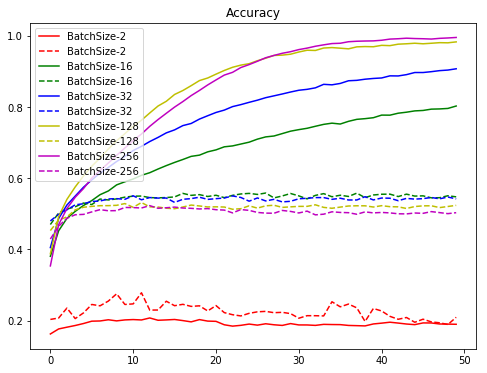

In [16]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Hw3

In [15]:
def build_mlp_3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batchSize = %.6f." % (bs))

    model = build_mlp_3(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=bs, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "BatchSize-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with batchSize = 2.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
________________________

50000/50000 [==============================] - 761s 15ms/step - loss: 1.9257 - acc: 0.3153 - val_loss: 1.6578 - val_acc: 0.4270
Epoch 50/50
50000/50000 [==============================] - 761s 15ms/step - loss: 1.9167 - acc: 0.3185 - val_loss: 1.6935 - val_acc: 0.4256
Experiment with batchSize = 16.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (Non

50000/50000 [==============================] - 99s 2ms/step - loss: 0.4041 - acc: 0.8593 - val_loss: 2.1046 - val_acc: 0.5352
Epoch 50/50
50000/50000 [==============================] - 99s 2ms/step - loss: 0.3981 - acc: 0.8627 - val_loss: 2.0900 - val_acc: 0.5441
Experiment with batchSize = 32.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1

50000/50000 [==============================] - 52s 1ms/step - loss: 0.2078 - acc: 0.9273 - val_loss: 2.5929 - val_acc: 0.5335
Epoch 49/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.2081 - acc: 0.9290 - val_loss: 2.6220 - val_acc: 0.5365
Epoch 50/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.1974 - acc: 0.9311 - val_loss: 2.6566 - val_acc: 0.5280
Experiment with batchSize = 128.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (

Epoch 48/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.0800 - acc: 0.9748 - val_loss: 3.0133 - val_acc: 0.5193
Epoch 49/50
50000/50000 [==============================] - 17s 333us/step - loss: 0.0780 - acc: 0.9760 - val_loss: 3.0097 - val_acc: 0.5226
Epoch 50/50
50000/50000 [==============================] - 17s 335us/step - loss: 0.0716 - acc: 0.9779 - val_loss: 3.0180 - val_acc: 0.5262
Experiment with batchSize = 256.000000.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer

Epoch 48/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.0741 - acc: 0.9869 - val_loss: 2.6295 - val_acc: 0.5111
Epoch 49/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.0693 - acc: 0.9877 - val_loss: 2.6531 - val_acc: 0.5119
Epoch 50/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.0676 - acc: 0.9872 - val_loss: 2.7217 - val_acc: 0.5021


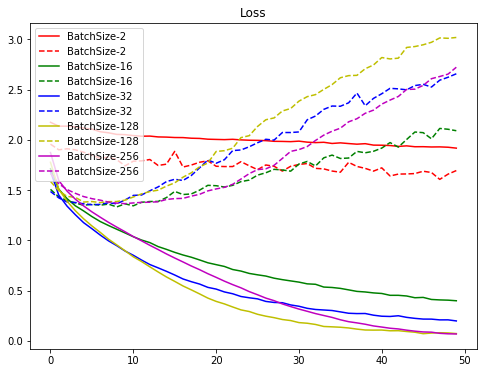

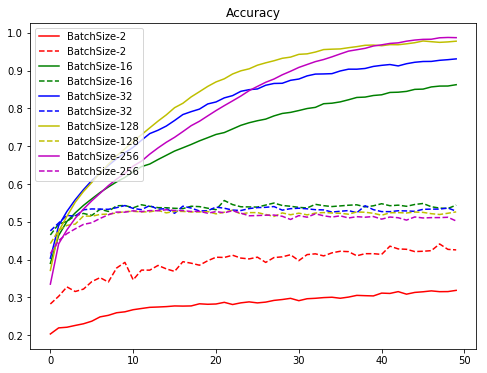

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k",
             "tab:orange","tab:purple","tab:brown","tab:pink","tab:gray","tab:cyan"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()